<a href="https://colab.research.google.com/github/emanuel379/Regressao---II/blob/main/Regress%C3%A3o_Beta_com_dados_de_felicidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considerando os resultados obtidos com o modelo de regressão normal, e sabendo que Happiness Score é uma variável resposta limitada que varia na escala de 0 a 10, temos que um modelo de resposta limitada, como a regressão Beta se mostra mais realista, assim temos:

In [3]:
install.packages("dplyr")
install.packages("readr")
install.packages("gamlss")

library(dplyr)
library(readr)
library(gamlss)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gamlss.data’, ‘gamlss.dist’


Loading required package: splines

Loading required package: gamlss.data


Attaching package: ‘gamlss.data’


The following object is masked from ‘package:datasets’:

    sleep


Loading required package: gamlss.dist

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


Loading required package: parallel

 **********   GAMLSS Version 5.4-22  ********** 

For more on GAMLSS look at https://www.gamlss.com/

Type gamlssNews() to see new features/changes/bug fixes.




In [7]:
# Read CSV files
df1 <- read.csv("Life expectancy.csv", stringsAsFactors = FALSE)
df2 <- read.csv("Suicide Rate.csv", stringsAsFactors = FALSE)

# If 'Year' is missing in one dataset, merge only by 'Country'
df <- merge(df1, df2, by = "Country", all = TRUE)

# Convert 'GDP per capita' to numeric (removing commas)
df$GDP.per.capita <- as.numeric(gsub(",", "", df$GDP.per.capita))

# View the final dataframe
print(df)

                     Country Life.Expectancy..years....Men
1                Afghanistan                          60.6
2                    Albania                          74.8
3                    Algeria                          73.3
4                    Andorra                          81.7
5                     Angola                          58.1
6        Antigua and Barbuda                          74.4
7                  Argentina                          74.7
8                    Armenia                          72.6
9                  Australia                          80.5
10                   Austria                          81.2
11                Azerbaijan                          70.7
12                   Bahamas                          71.6
13                   Bahrain                          75.7
14                Bangladesh                          68.5
15                  Barbados                          74.7
16                   Belarus                          72

# **Ajustando o modelo:**

In [15]:
# Rearanjando para o intervalo 0 a 1

df$Happiness.Score <- df$Happiness.Score / 10

df <- na.omit(df)

# Fit the model
beta_gam <- gamlss(
  Happiness.Score ~ Life.Expectancy..years....Men + Fertility.Rate..births.per.woman. + GDP.per.capita,
  data = df,
  family = BE(mu.link = "logit", sigma.link = "logit"),
  control = gamlss.control(trace = FALSE, n.cyc = 150)
)

# Print model summary
summary(beta_gam)


******************************************************************
Family:  c("BE", "Beta") 

Call:  gamlss(formula = Happiness.Score ~ Life.Expectancy..years....Men +  
    Fertility.Rate..births.per.woman. + GDP.per.capita,  
    family = BE(mu.link = "logit", sigma.link = "logit"),  
    data = df, control = gamlss.control(trace = FALSE,          n.cyc = 150)) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  logit
Mu Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.106e+01  2.021e-01 -54.748  < 2e-16 ***
Life.Expectancy..years....Men      1.798e-02  2.515e-03   7.149 6.10e-11 ***
Fertility.Rate..births.per.woman. -2.449e-02  1.045e-02  -2.344   0.0207 *  
GDP.per.capita                     1.871e-06  4.287e-07   4.365 2.61e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

-----------------------------------------------

Considerando um nível de significância **α = 5%**, temos que todas as variáveis podem ser considerandas como significativas para o modelo.

# **Análise diagnóstica:**

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.0005049491 
                       variance   =  1.007524 
               coef. of skewness  =  -0.2520137 
               coef. of kurtosis  =  2.536725 
Filliben correlation coefficient  =  0.9918537 
******************************************************************


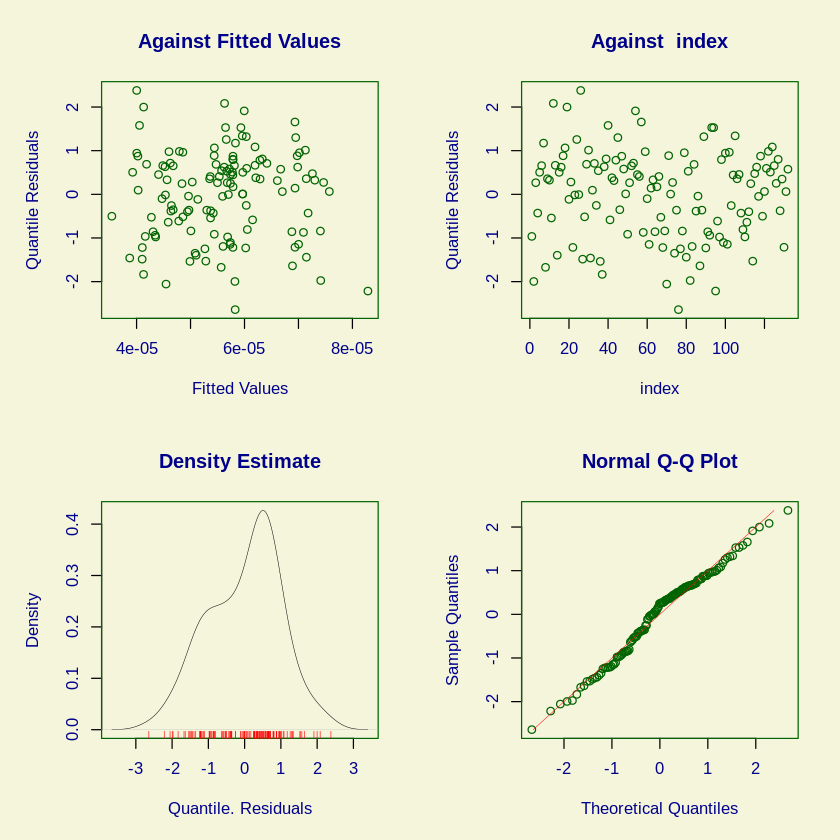

In [16]:
 plot(beta_gam)

Com base na análise diagnóstica, temos que o modelo parece oferecer um bom ajuste aos dados, uma vez que verifica-se um padrão de dispersão bastante aleatório para os resíduos, também observando-se a satisfação do pressuposto de normalidade dos resíduos, ainda que a estimativa da densidade nos traga evidências da existência de uma assimetria à esquerda.